# Tarea 1 de Probabilidad y Estadística

# Lectura de Datos

Aqui se importan los datos del CSV

In [1]:
import os
import pandas as pd

path = os.path.join('./AirQualityUCI.csv')
data = pd.read_csv(path, delimiter=';',parse_dates=[['Date', 'Time']])
data['Date_Time'] = [x.replace('.', ':') for x in data['Date_Time']] 

data

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtro

In [2]:
data = data[['Date_Time' ,'PT08.S2(NMHC)']]
data = data[data['PT08.S2(NMHC)'].notnull()]
data = data[data['PT08.S2(NMHC)'] != -200]
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data = data.sort_values(by=['Date_Time'])

data

,Date_Time,PT08.S2(NMHC)
510,2004-01-04 00:00:00,825.0
511,2004-01-04 01:00:00,770.0
512,2004-01-04 02:00:00,716.0
513,2004-01-04 03:00:00,713.0
514,2004-01-04 04:00:00,615.0
...,...,...
8809,2005-12-03 19:00:00,878.0
8810,2005-12-03 20:00:00,1119.0
8811,2005-12-03 21:00:00,1064.0
8812,2005-12-03 22:00:00,803.0


# Obtener datos de la variable

In [3]:
import numpy as np
variable = np.sort(data['PT08.S2(NMHC)'].to_numpy()) # Convierte el dataframe a numpy array y lo ordena
print(variable)

[ 383.  383.  387. ... 1983. 2007. 2214.]


# Mediana

In [4]:
median = np.median(variable) # Calculo de la mediana de los datos
print(median)

909.0


# Media

In [5]:
promedio = np.mean(variable) # Calculo del promedio de los datos
print(promedio)

939.1533755978201


# Moda

In [6]:
import statistics as stat
moda = stat.mode(variable) # Calcula la moda de los datos
print(moda)

853.0


# Calculo de los Cuartiles y Cantidad de Datos

In [7]:
import math

pt = data['PT08.S2(NMHC)'].sort_values().values

large = len(pt)
print("Cantidad de Datos:", large)

position_1 = math.ceil(large/4)
position_3 = math.ceil(3 * large/4)

Q1 = pt[position_1]
Q2 = median
Q3 = pt[position_3]

print("Q1: ", Q1)
print("Q2: ", Q2)
print("Q3: ", Q3)

Cantidad de Datos: 8991
Q1:  735.0
Q2:  909.0
Q3:  1116.0


# Rango Intercuartilico Muestral

In [8]:
RIC = Q3 - Q1
print(RIC)

381.0


# Diagrama de Cajas

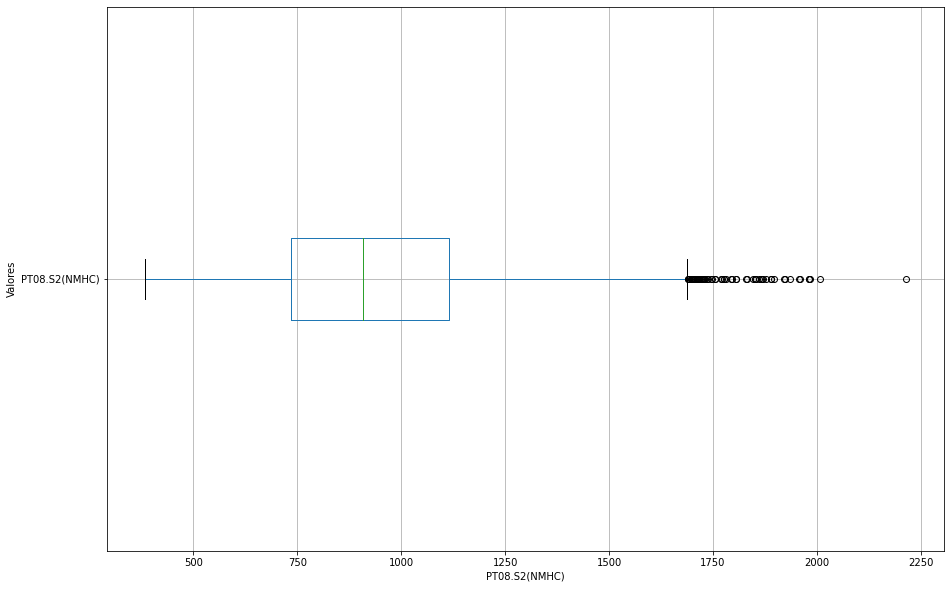

In [18]:
import matplotlib.pyplot as plt

data.boxplot(column='PT08.S2(NMHC)',vert=False, figsize=(15,10))

plt.xlabel("PT08.S2(NMHC)")
plt.ylabel("Valores")
plt.show()

# Porcentaje de valores anormales y cantidad de valores anormales

In [10]:
anormal = data[data['PT08.S2(NMHC)'] > (1.5 * RIC + RIC + Q1)]
print("Cantidad de Datos Anormales:",len(anormal))

percentage = len(anormal)/large * 100

print("Porcentaje de Datos Anormales:",percentage)

Cantidad de Datos Anormales: 66
Porcentaje de Datos Anormales: 0.7340674007340674


# Titania vs Tiempo

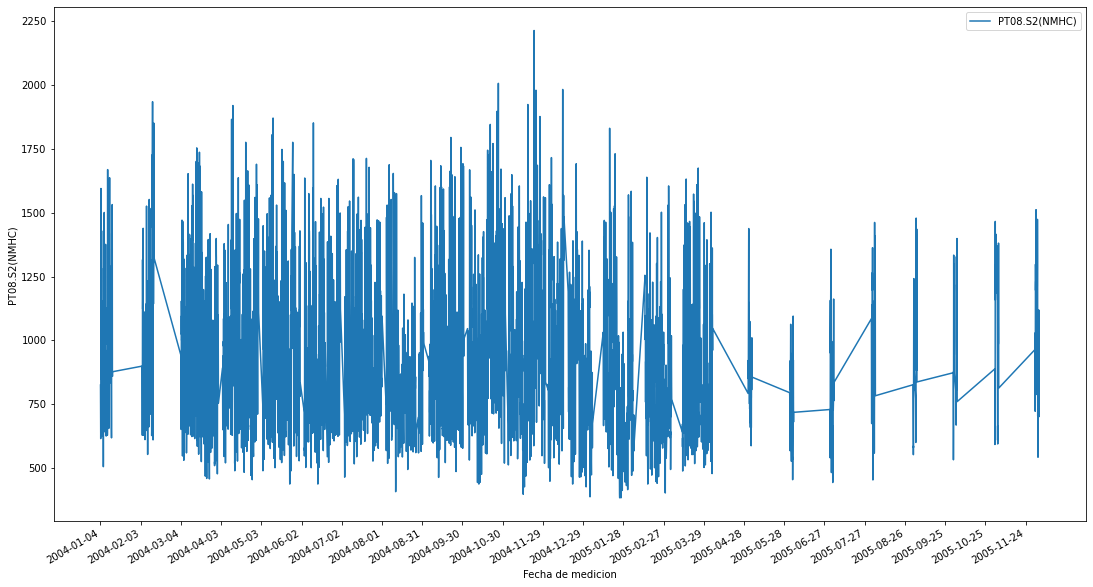

In [11]:
import numpy as np

ts = data
ts.index = data['Date_Time']
ts = ts[['PT08.S2(NMHC)']]

ts.cumsum()

ts.plot()

plt.gcf().set_size_inches(18.5, 10.5)
x = ts.index.values
plt.xticks(np.arange(min(x), max(x)+1, np.timedelta64(30,'D')))
plt.xlabel("Fecha de medicion")
plt.ylabel("PT08.S2(NMHC)")
plt.show()

# Varianza


In [12]:
varianza = np.var(variable) # Calculo de la varianza de los datos
print(varianza)


71191.09236959745


# Desviación estándar



In [13]:
desviacion = np.std(variable) # Calculo de la desviación estándar de los datos
print(desviacion)

266.8165893822898


# Rango muestral

In [14]:
maximo=np.amax(variable)
minimo=np.amin(variable)
rangoMuestral=maximo-minimo
print(rangoMuestral)

1831.0


# Puntos 

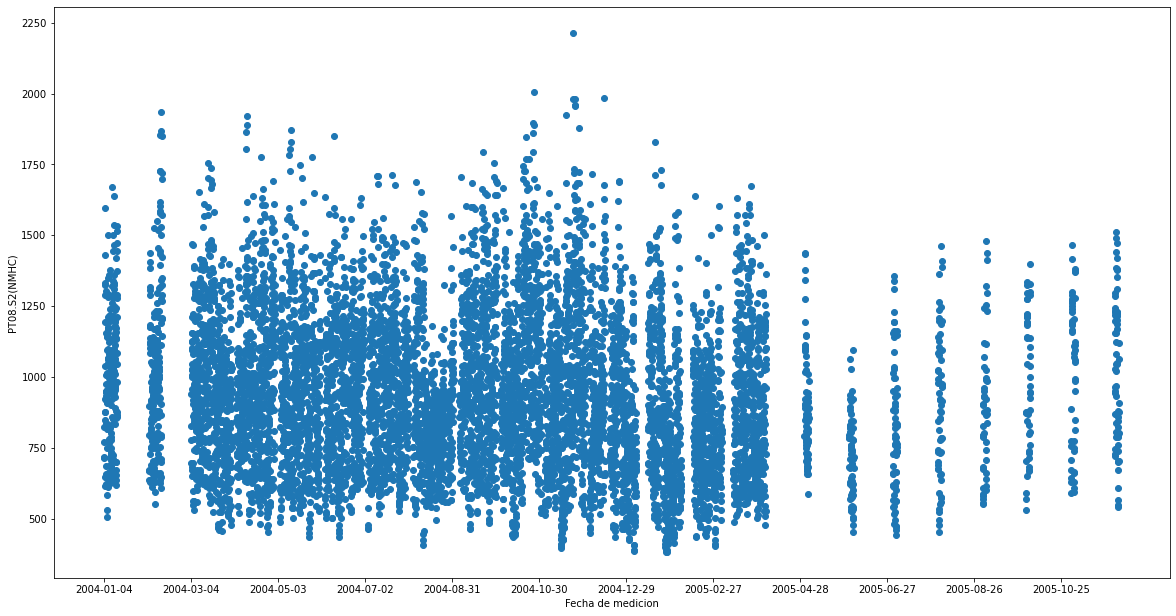

In [15]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
# Dibujar puntos
ax.scatter(x =ts.index, y = ts)
plt.gcf().set_size_inches(20, 10.5)
x = ts.index.values
plt.xticks(np.arange(min(x), max(x)+1, np.timedelta64(60,'D')))
plt.xlabel("Fecha de medicion")
plt.ylabel("PT08.S2(NMHC)")
plt.show()


# Histograma

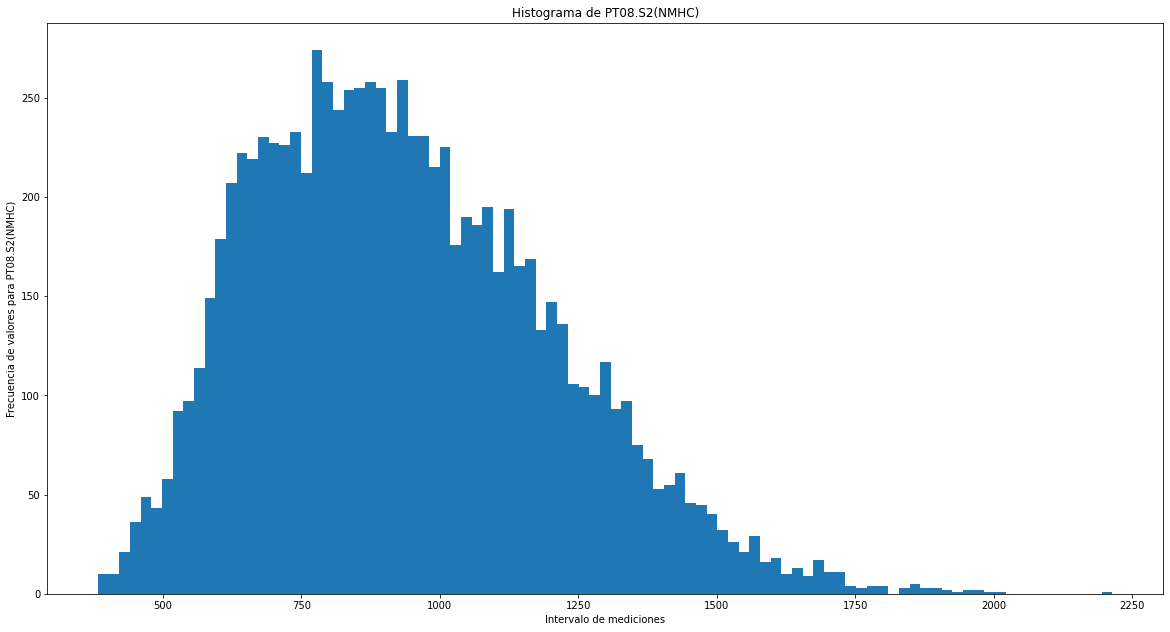

In [16]:
# Crear la figura y los ejes
intervalos = math.ceil(math.sqrt(variable.size))
plt.hist(x = variable, bins = intervalos)
plt.title("Histograma de PT08.S2(NMHC)")
plt.xlabel("Intervalo de mediciones")
plt.ylabel("Frecuencia de valores para PT08.S2(NMHC)")
plt.gcf().set_size_inches(20, 10.5)
plt.show()
